# ⚠️ Auto-generated Notebook
    
This notebook is automatically compiled from source files in `/workspaces/awesome-matrix/src/examples/02_dot_and_inner_products`.
**Do not edit this file directly** as your changes will be overwritten.

To make changes:
1. Edit the source file `/workspaces/awesome-matrix/src/examples/02_dot_and_inner_products/01_introduction.py` instead
2. Run the compile script to regenerate this notebook

See [COMPILE.md](docs/COMPILE.md) for more information.


# 1. Dot and Inner Products: Building Intuition

This example demonstrates dot products and inner products with PyTorch and
builds intuition for these fundamental vector operations.

Dot products and inner products are essential operations in linear algebra that form the basis for:

- Measuring similarity between vectors
- Calculating projections and orthogonality
- Computing lengths and angles between vectors
- Developing neural network operations

In this tutorial, we'll explore these operations visually to build an intuitive understanding.


## 1.1 Setup and Imports

First, we'll import the necessary libraries and set up our visualization tools.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from typing import Tuple, List
import matplotlib.patches as patches

# Create a nicer colormap for visualizing vectors and matrices
colors = [(0.8, 0.8, 1), (0.1, 0.3, 0.8)]  # Light blue to darker blue
cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=100)


## 1.2 Basic Vector Creation

Let's create some simple vectors to work with:


In [2]:
# Create two 3-dimensional vectors
v1 = torch.tensor([2., 3., 1.])
v2 = torch.tensor([1., 0., 2.])

print(f"Vector v1: {v1} with shape {v1.shape}")
print(f"Vector v2: {v2} with shape {v2.shape}")


Vector v1: tensor([2., 3., 1.]) with shape torch.Size([3])
Vector v2: tensor([1., 0., 2.]) with shape torch.Size([3])


## 1.3 Visualizing Vectors in 2D/3D

To better understand vectors, let's create functions to visualize them in 2D and 3D space.


In [3]:
def visualize_vectors_2d(vectors, names=None, colors=None, figsize=(8, 8)):
    """
    Visualize 2D vectors as arrows from the origin.
    
    Args:
        vectors: List of PyTorch tensors (each should be 2D)
        names: Optional list of names for the vectors
        colors: Optional list of colors for the vectors
        figsize: Figure size
    """
    if names is None:
        names = [f"Vector {i+1}" for i in range(len(vectors))]
    
    if colors is None:
        colors = plt.cm.tab10(np.linspace(0, 1, len(vectors)))
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Find the maximum magnitude for setting axis limits
    max_mag = max([torch.norm(v).item() for v in vectors]) * 1.2
    
    # Set axis limits and grid
    ax.set_xlim(-max_mag, max_mag)
    ax.set_ylim(-max_mag, max_mag)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    
    # Plot each vector
    for i, vector in enumerate(vectors):
        v = vector.detach().cpu().numpy()
        ax.arrow(0, 0, v[0], v[1], 
                 head_width=max_mag/20, 
                 head_length=max_mag/20, 
                 fc=colors[i], ec=colors[i], 
                 label=names[i])
        
        # Add vector coordinates as text
        ax.text(v[0]*1.1, v[1]*1.1, f"({v[0]:.1f}, {v[1]:.1f})", 
                color=colors[i], fontsize=12)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Vector Visualization in 2D')
    ax.legend()
    plt.tight_layout()
    plt.show()


In [4]:
def visualize_vectors_3d(vectors, names=None, colors=None, figsize=(10, 8)):
    """
    Visualize 3D vectors as arrows from the origin.
    
    Args:
        vectors: List of PyTorch tensors (each should be 3D)
        names: Optional list of names for the vectors
        colors: Optional list of colors for the vectors
        figsize: Figure size
    """
    from mpl_toolkits.mplot3d import Axes3D
    
    if names is None:
        names = [f"Vector {i+1}" for i in range(len(vectors))]
    
    if colors is None:
        colors = plt.cm.tab10(np.linspace(0, 1, len(vectors)))
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    
    # Find the maximum magnitude for setting axis limits
    max_mag = max([torch.norm(v).item() for v in vectors]) * 1.2
    
    # Set axis limits
    ax.set_xlim([-max_mag, max_mag])
    ax.set_ylim([-max_mag, max_mag])
    ax.set_zlim([-max_mag, max_mag])
    
    # Add axis lines
    ax.plot([-max_mag, max_mag], [0, 0], [0, 0], 'k--', alpha=0.3)
    ax.plot([0, 0], [-max_mag, max_mag], [0, 0], 'k--', alpha=0.3)
    ax.plot([0, 0], [0, 0], [-max_mag, max_mag], 'k--', alpha=0.3)
    
    # Plot each vector
    for i, vector in enumerate(vectors):
        v = vector.detach().cpu().numpy()
        ax.quiver(0, 0, 0, v[0], v[1], v[2], 
                  color=colors[i], 
                  label=names[i],
                  arrow_length_ratio=0.1)
        
        # Add vector coordinates as text
        ax.text(v[0]*1.1, v[1]*1.1, v[2]*1.1, 
                f"({v[0]:.1f}, {v[1]:.1f}, {v[2]:.1f})", 
                color=colors[i], fontsize=10)
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title('Vector Visualization in 3D')
    ax.legend()
    plt.tight_layout()
    plt.show()


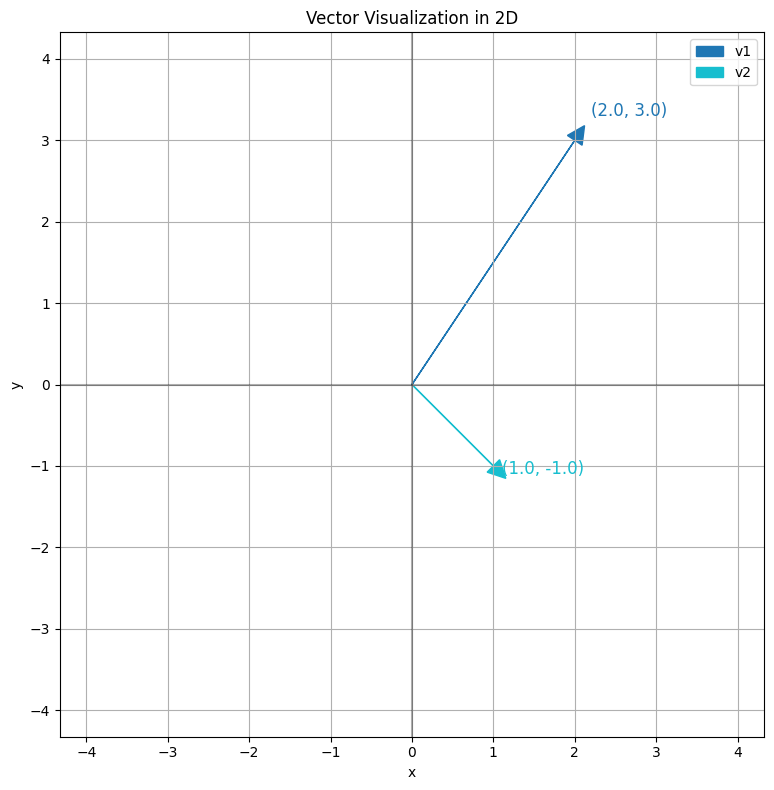

In [5]:
# Create vectors for 2D visualization
v1_2d = torch.tensor([2., 3.])
v2_2d = torch.tensor([1., -1.])

# Visualize the 2D vectors
visualize_vectors_2d([v1_2d, v2_2d], names=["v1", "v2"])


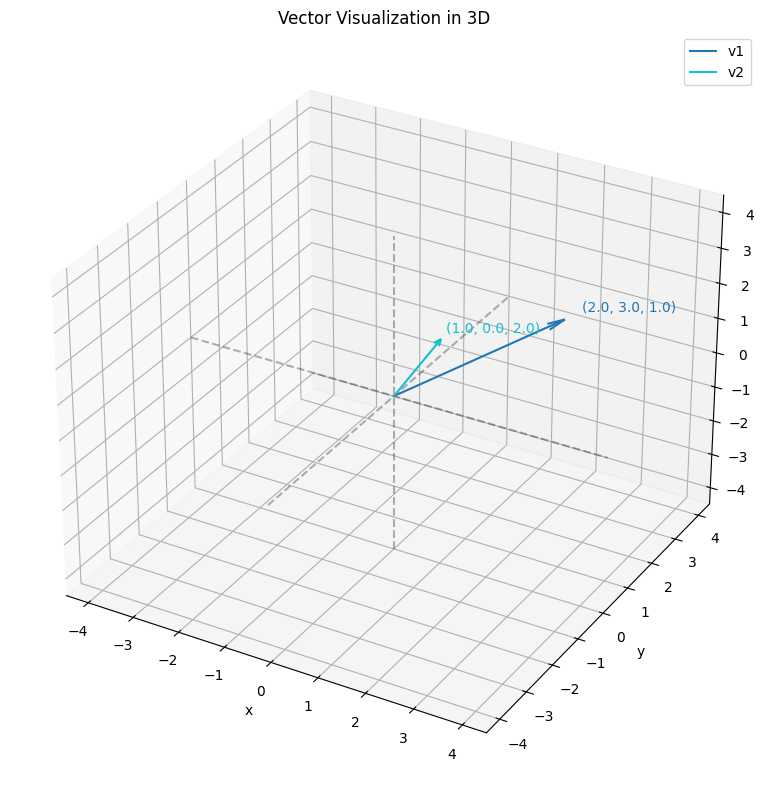

In [6]:
# Visualize the 3D vectors
visualize_vectors_3d([v1, v2], names=["v1", "v2"])


## 1.4 What is a Dot Product?

The dot product of two vectors is calculated by:

1. Multiplying corresponding elements
2. Summing up all these products

Mathematically, for vectors **a** and **b** of same length n:

$$\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i = a_1 b_1 + a_2 b_2 + ... + a_n b_n$$

Let's calculate the dot product of our vectors:


In [7]:
# Calculate dot product manually
dot_product_manual = 0
for i in range(len(v1)):
    dot_product_manual += v1[i] * v2[i]
    
print(f"Manual dot product calculation:")
print(f"v1 · v2 = {v1[0]} × {v2[0]} + {v1[1]} × {v2[1]} + {v1[2]} × {v2[2]}")
print(f"v1 · v2 = {v1[0] * v2[0]} + {v1[1] * v2[1]} + {v1[2] * v2[2]}")
print(f"v1 · v2 = {dot_product_manual}")

# Using PyTorch's built-in dot function
dot_product_torch = torch.dot(v1, v2)
print(f"\nPyTorch dot product: {dot_product_torch}")


Manual dot product calculation:
v1 · v2 = 2.0 × 1.0 + 3.0 × 0.0 + 1.0 × 2.0
v1 · v2 = 2.0 + 0.0 + 2.0
v1 · v2 = 4.0

PyTorch dot product: 4.0


## 1.5 Visualizing the Dot Product

Let's visualize what the dot product means geometrically. The dot product can be interpreted as:

$$\mathbf{a} \cdot \mathbf{b} = ||\mathbf{a}|| \times ||\mathbf{b}|| \times \cos(\theta)$$

Where:
- $||\mathbf{a}||$ is the magnitude (length) of vector a
- $||\mathbf{b}||$ is the magnitude of vector b
- $\theta$ is the angle between the vectors


In [8]:
def visualize_dot_product_geometric(v1, v2, figsize=(10, 8)):
    """
    Visualize the geometric interpretation of dot product in 2D.
    
    Args:
        v1, v2: PyTorch tensors (2D vectors)
        figsize: Figure size
    """
    # Convert to numpy
    v1_np = v1.detach().cpu().numpy()
    v2_np = v2.detach().cpu().numpy()
    
    # Calculate magnitudes
    mag_v1 = np.linalg.norm(v1_np)
    mag_v2 = np.linalg.norm(v2_np)
    
    # Calculate dot product and angle
    dot_prod = np.dot(v1_np, v2_np)
    cos_theta = dot_prod / (mag_v1 * mag_v2)
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angle_deg = np.degrees(angle)
    
    # Calculate the projection of v1 onto v2
    proj_scalar = dot_prod / mag_v2
    proj_vector = (proj_scalar / mag_v2) * v2_np
    
    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    
    # Find the maximum magnitude for setting axis limits
    max_mag = max(mag_v1, mag_v2) * 1.5
    
    # Set axis limits and grid
    ax.set_xlim(-max_mag, max_mag)
    ax.set_ylim(-max_mag, max_mag)
    ax.grid(True)
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    ax.set_aspect('equal')
    
    # Plot the vectors
    ax.arrow(0, 0, v1_np[0], v1_np[1], 
             head_width=max_mag/20, head_length=max_mag/20, 
             fc='blue', ec='blue', label='v1')
    ax.arrow(0, 0, v2_np[0], v2_np[1], 
             head_width=max_mag/20, head_length=max_mag/20, 
             fc='red', ec='red', label='v2')
    
    # Draw the projection line
    ax.plot([0, v2_np[0]], [0, v2_np[1]], 'r-', linewidth=2)
    ax.plot([v1_np[0], proj_vector[0]], [v1_np[1], proj_vector[1]], 
            'g--', linewidth=1.5, label='Projection line')
    
    # Draw the projection point and vector
    ax.scatter(proj_vector[0], proj_vector[1], color='green', s=50)
    ax.arrow(0, 0, proj_vector[0], proj_vector[1], 
             head_width=max_mag/30, head_length=max_mag/30, 
             fc='green', ec='green', label='Projection of v1 onto v2')
    
    # Add angle arc
    angle_radius = max_mag / 8
    angle_patch = patches.Arc((0, 0), angle_radius, angle_radius,
                             theta1=0, theta2=angle_deg,
                             linewidth=1.5, color='purple')
    ax.add_patch(angle_patch)
    ax.text(angle_radius/2, angle_radius/4, f"{angle_deg:.1f}°", 
            fontsize=12, color='purple')
    
    # Add text annotations
    ax.text(v1_np[0]*1.1, v1_np[1]*1.1, f"v1 ({v1_np[0]:.1f}, {v1_np[1]:.1f})", 
            color='blue', fontsize=12)
    ax.text(v2_np[0]*1.1, v2_np[1]*1.1, f"v2 ({v2_np[0]:.1f}, {v2_np[1]:.1f})", 
            color='red', fontsize=12)
    ax.text(proj_vector[0]*1.1, proj_vector[1]*1.1, 
            f"proj = {proj_scalar:.2f} * unit(v2)", 
            color='green', fontsize=12)
    
    # Add formula and calculation
    title = "Geometric Interpretation of Dot Product\n"
    title += f"v1 · v2 = ||v1|| × ||v2|| × cos(θ)\n"
    title += f"{dot_prod:.2f} = {mag_v1:.2f} × {mag_v2:.2f} × {cos_theta:.2f}"
    ax.set_title(title)
    
    ax.legend()
    plt.tight_layout()
    plt.show()
    
    return dot_prod, angle_deg, proj_scalar


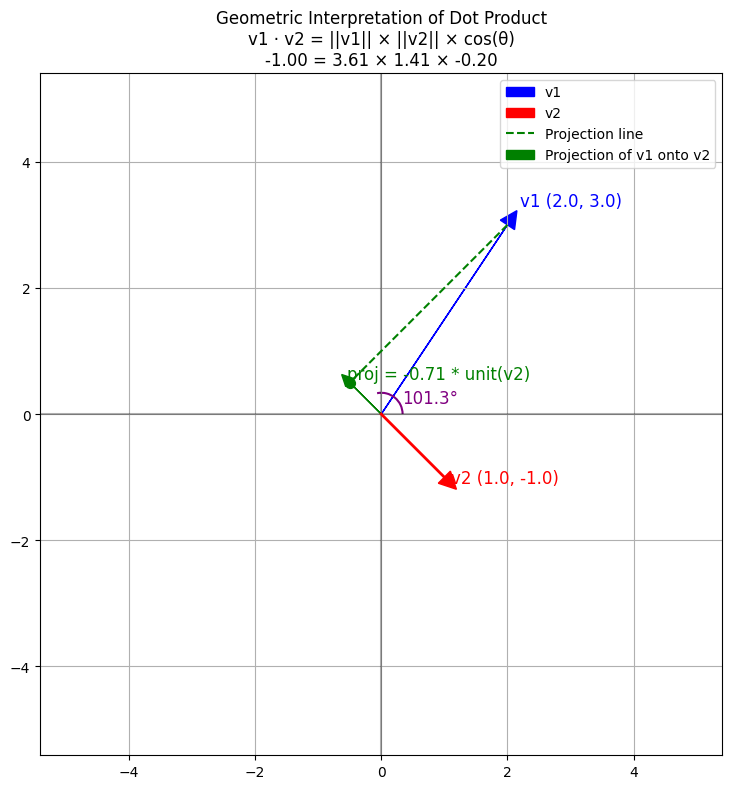

Dot product: -1.00
Angle between vectors: 101.31 degrees
Projection of v1 onto v2: -0.71


In [9]:
# Use 2D vectors to visualize the geometric interpretation
dot_product, angle, projection = visualize_dot_product_geometric(v1_2d, v2_2d)
print(f"Dot product: {dot_product:.2f}")
print(f"Angle between vectors: {angle:.2f} degrees")
print(f"Projection of v1 onto v2: {projection:.2f}")


## 1.6 Key Properties of Dot Products

Dot products have several important properties:

1. Two vectors are perpendicular (orthogonal) if their dot product is 0
2. The dot product is positive if the angle between vectors is less than 90°
3. The dot product is negative if the angle is greater than 90°
4. The dot product of a vector with itself is the square of its magnitude

Let's explore these properties:


Dot product of perpendicular vectors: 0.0


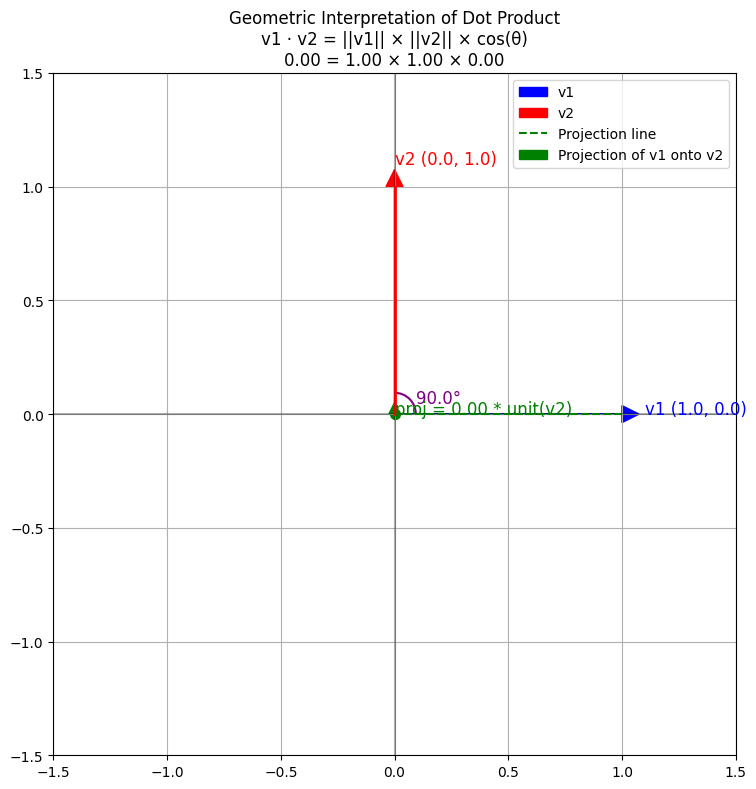

Angle between perpendicular vectors: 90.00 degrees


In [10]:
# Create perpendicular vectors
v_perp1 = torch.tensor([1., 0.])
v_perp2 = torch.tensor([0., 1.])

# Calculate dot product
dot_perp = torch.dot(v_perp1, v_perp2)
print(f"Dot product of perpendicular vectors: {dot_perp}")

# Visualize
_, angle_perp, _ = visualize_dot_product_geometric(v_perp1, v_perp2)
print(f"Angle between perpendicular vectors: {angle_perp:.2f} degrees")


Dot product of vectors with obtuse angle: -1.0


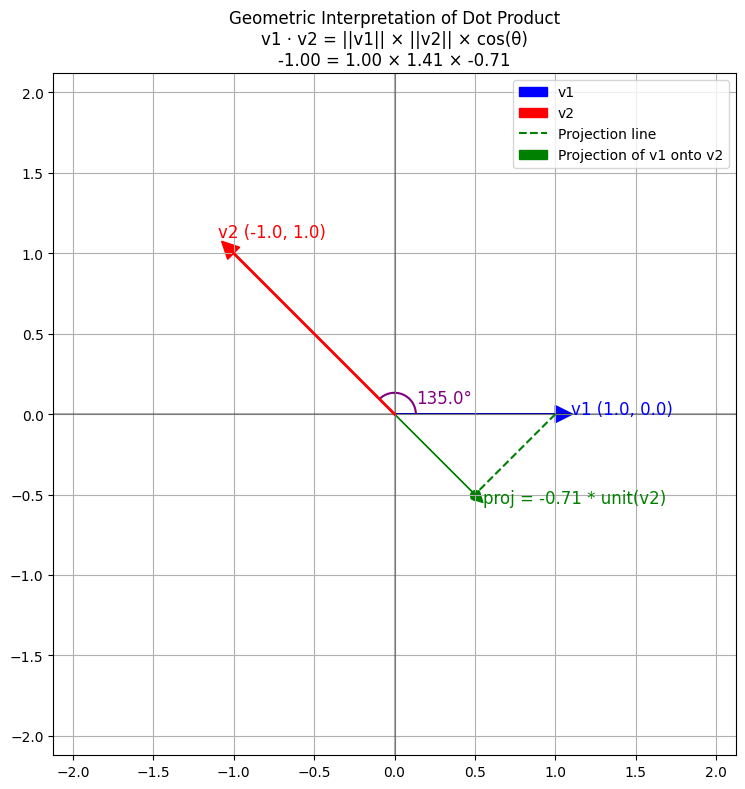

Angle between vectors: 135.00 degrees


In [11]:
# Create vectors with angle > 90°
v_obtuse1 = torch.tensor([1., 0.])
v_obtuse2 = torch.tensor([-1., 1.])

# Calculate dot product
dot_obtuse = torch.dot(v_obtuse1, v_obtuse2)
print(f"Dot product of vectors with obtuse angle: {dot_obtuse}")

# Visualize
_, angle_obtuse, _ = visualize_dot_product_geometric(v_obtuse1, v_obtuse2)
print(f"Angle between vectors: {angle_obtuse:.2f} degrees")


In [12]:
# Dot product of a vector with itself = magnitude squared
v_self = torch.tensor([3., 4.])
dot_self = torch.dot(v_self, v_self)
magnitude = torch.norm(v_self)

print(f"Vector: {v_self}")
print(f"Dot product with itself: {dot_self}")
print(f"Magnitude: {magnitude}")
print(f"Magnitude squared: {magnitude**2}")


Vector: tensor([3., 4.])
Dot product with itself: 25.0
Magnitude: 5.0
Magnitude squared: 25.0


## 1.7 Conclusion

In this introduction, we've explored:

- What dot products are and how to calculate them
- The geometric interpretation of dot products
- Visualizing vectors and their relationships
- Key properties of dot products

The dot product is a fundamental operation that measures the similarity between vectors. In the next sections, we'll explore more practical applications, matrix-vector products, and different inner product definitions.